### Problem 1.
fit the Gamma disribution over the health data.

In [1]:
import numpy as np
from math import gamma
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt

## a)

In [2]:
data = np.loadtxt(r'C:\Users\Max\Documents\BootCamp2017\Econ\Wk4_StrEst\data\clms.txt')
data.shape
a, b, c, d = data.mean(), np.median(data), data.max(), data.min()
e = np.std(data)

print('mean:',a,' med:',b, 'max:',c, 'min:',d, 'std:',e)

mean: 720.277975327  med: 172.21 max: 227967.25 min: 0.01 std: 3972.66375639


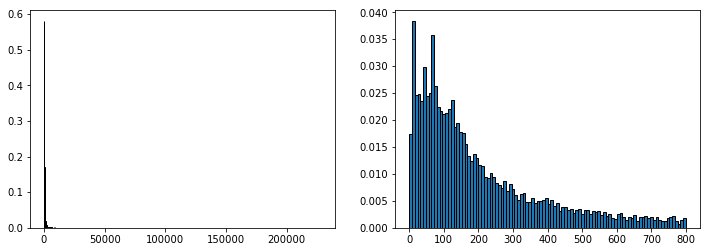

In [3]:
subsample_size = np.array([data <= 800]).sum() 
weights = 1 / len(data)
weights_sub = np.repeat(weights, subsample_size)
weights_all = np.repeat(weights, len(data))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(data, bins=1000, weights=weights_all, edgecolor='k')
ax[1].hist(data[data <= 800], bins=100, weights=weights_sub, edgecolor='k')
plt.show()

The first histogramm tells that we have some outliers with really high health claims. It virtually tells nothing about the domain where the most part of the probability is. 

## b)

In [4]:
def gamma_pdf(xvals, alpha, beta):
    
    numerator = xvals **(alpha - 1) * np.exp(-(xvals / beta))
    #print(alpha)
    denominator =   (beta ** alpha)*gamma(alpha) 
    pdf_vals =  numerator / denominator
    
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def criterion_fun(params, *args):
    xvals = args
    alpha, beta = params
    ll = log_lik_gamma(xvals, alpha, beta)
    crit = -ll
    
    return crit

In [5]:
beta_0 = np.var(data) / np.mean(data)
alpha_0 = np.mean(data) / beta_0  
params_init = np.array([alpha_0, beta_0])
gamma_args = data
gam_results = opt.minimize(criterion_fun, params_init,
                       args=(gamma_args), 
                       method='L-BFGS-B',
                      bounds=((1e-10, None), (1e-10, None)))

gam_loglik = -gam_results.fun 
alpha_gam, beta_gam = gam_results.x

In [6]:
print('log_lik;',-gam_results.fun,'alpha:', gam_results.x[0],'beta:',
      gam_results.x[1])

log_lik; -82076.4516057 alpha: 0.221755316958 beta: 21911.0646993


C:\Users\Max\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


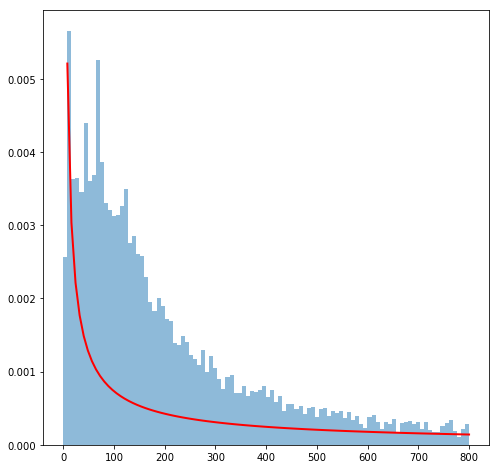

In [7]:
x_vals = np.linspace(0, 800, 100)
weights = np.repeat(1 / subsample_size, subsample_size)


gamm = gamma_pdf(x_vals, gam_results.x[0], gam_results.x[1])

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x_vals, gamm, 'r-', lw=2,)
ax.hist(data[data < 800], bins=100, normed=True, alpha=0.5)
plt.show()

## c) 
#### fitting the generalized gamma distribution

In [8]:
def gg_pdf(xvals, alpha, beta, m):
    
    numerator = m* xvals **(alpha - 1) * np.exp(-(xvals / beta)**m)
    #print(alpha)
    denominator =   beta ** alpha*gamma(alpha/m) 
    pdf_vals =  numerator / denominator
    
    return pdf_vals


def log_lik_gg(xvals, alpha, beta, m):
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def gg_crit(params, *args):
    xvals = args
    alpha, beta, m = params
    ll = log_lik_gg(xvals, alpha, beta, m)
    crit = -ll
    
    return crit

In [9]:
beta_0 = gam_results.x[1]
alpha_0 = gam_results.x[0]
m_0 = 1.0
gg_params_init = np.array([alpha_0, beta_0, m_0])
gamma_args = [data]
gg_results = opt.minimize(gg_crit, gg_params_init,
                       args=(gamma_args), 
                       method='L-BFGS-B',
                      bounds=((1e-10, None), (1e-10, None),
                              (1e-10, None)))
gg_loglik = -gg_results.fun

In [10]:
gg_results

      fun: 82076.446790240763
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.64525476,  0.09167707, -1.04337232])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737657e-01,   2.19110644e+04,   9.97091641e-01])

In [11]:
print('log_lik;',-gg_results.fun,'alpha:', gg_results.x[0],'beta:',
      gg_results.x[1], 'm:',gg_results.x[2] )

log_lik; -82076.4467902 alpha: 0.221737657225 beta: 21911.0644276 m: 0.997091640767


 As $m$ is close to one and the other parameters barley changed, the GG distrbution does not seem to lead to a substatial increase in the fit. Also the Loglikeliood is exactly th same.

C:\Users\Max\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


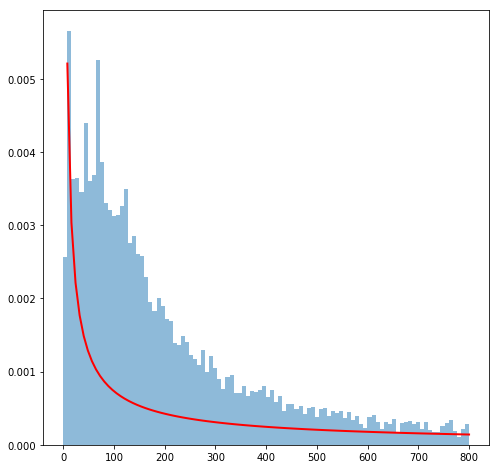

In [12]:
x_vals = np.linspace(0, 800, 100)
weights = np.repeat(1 / subsample_size, subsample_size)


gg = gg_pdf(x_vals, gg_results.x[0], gg_results.x[1], gg_results.x[2])

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x_vals, gamm, 'r-', lw=2,)
ax.hist(data[data < 800], bins=100, normed=True, alpha=0.5)
plt.show()

## d) 
#### Fitting the generalized beta 2 distribution

In [13]:
from scipy.special import beta


In [14]:
def gb2_pdf(xvals, a, b, p, q):
    
    numerator = a * xvals ** (a*p - 1)
    denominator = (b ** (a * p) * beta(p, q) * 
                   (1 + (xvals / b) ** a) ** (p + q))
    
    pdf_vals =  numerator / denominator
       
    return pdf_vals

def log_lik_gb2(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q )
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def gb2_crit(params, *args):
    xvals = args
    a, b, p, q = params
    ll = log_lik_gb2(xvals, a, b, p, q)
    crit = -ll
    return crit

In [15]:
q_0 = 10000
a_0 = gg_results.x[2]
p_0 = gg_results.x[0] / gg_results.x[2]
b_0 = q_0 **(1/m_0)*gg_results.x[1]

gb2_params_init = np.array([a_0, b_0, p_0, q_0])
gb2_args = data
gb2_results = opt.minimize(gb2_crit, gb2_params_init,
                       args=gb2_args, 
                       method='L-BFGS-B',
                      bounds=((1e-10, None), (1e-10, None),
                              (1e-10, None), (1e-10, None)))

gb2_loglik = -gb2_results.fun
a, b, p, q, = gb2_results.x
print('loglik:', gb2_loglik, 'a:', a, 'b:', b, 'p:', p, 'q:', q)

loglik: -76467.8091697 a: 0.701044571662 b: 219110644.276 p: 0.991640447887 q: 10000.0001247


C:\Users\Max\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


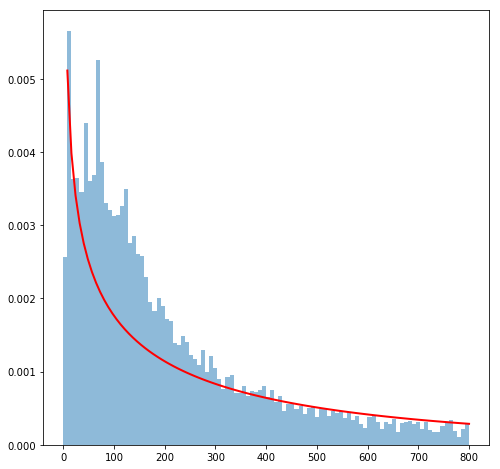

In [16]:
x_vals = np.linspace(0, 800, 100)
weights = np.repeat(1 / subsample_size, subsample_size)


gb2 = gb2_pdf(x_vals, gb2_results.x[0], gb2_results.x[1], gb2_results.x[2], gb2_results.x[3])

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x_vals, gb2, 'r-', lw=2,)
ax.hist(data[data < 800], bins=100, normed=True, alpha=0.5)
plt.show()

## e)
Testing the models against each other by likelihood ration tests.

In [17]:
def lr_test(llm, llh, df):
    LR_val = 2 * (llm - llh)
    p_val = 1.0 - sts.chi2.cdf(LR_val, df)
    return p_val

In [18]:
lr_test(gb2_loglik, gg_loglik, 2)

0.0

Strongly reject the GG model compared to the GB2 model.

In [19]:
lr_test(gb2_loglik, gam_loglik, 2)

0.0

As well as the Gamma-distribution model compared to the GB2 model.

In [20]:
lr_test(gg_loglik, gam_loglik, 1)

0.92182360786684181

When testing the first two models against each other, we cannot reject the hytpothesis that $m$ from the generalized gamma dist. is equal to one ( which corresponds to the gamma distribution).

## f)
How likely am I to have a monthly health care claim of more than $1,000?

In [21]:
# using the fitted GB2 distribution
from scipy.integrate import quad
gb2_1000, _ = quad(gb2_pdf, 0, 1000, args=(a, b, p, q))
gb2_1000 = 1 - gb2_1000
print('The estimated probability from the GB2-dist is', np.around(gb2_1000,3),'.')

The estimated probability from the GB2-dist is 0.163 .


In [22]:
gam_1000, _ = quad(gamma_pdf, 0, 1000, args=(alpha_gam, beta_gam))
gam_1000 = 1 - gam_1000
print('The estimated probability from the Gamma-dist is', np.around(gam_1000,3),'.')

The estimated probability from the Gamma-dist is 0.452 .
